Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libaries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [3]:
# Remove unnecessary columns
automobiles_df.drop(["normalized-losses", "symboling"], axis=1,
inplace=True)



#### Remove any duplicate rows

In [4]:
# Remove duplicate rows
automobiles_df.drop_duplicates()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

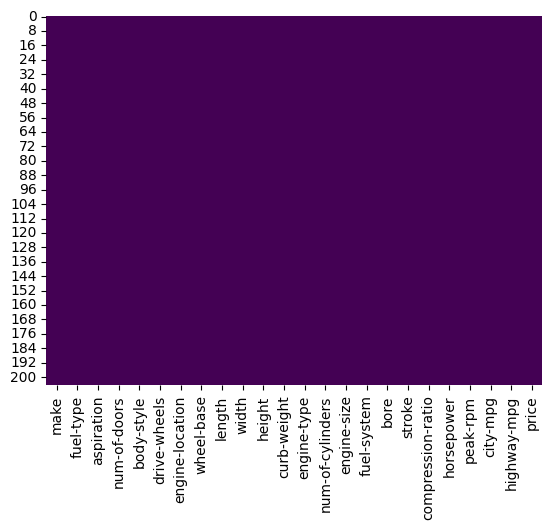

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
sns.heatmap(automobiles_df.isnull(), cbar=False, cmap="viridis")
plt.show()

# Remove rows with missing values
automobiles_df.dropna()


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [6]:
# Create variable for columns to be cleaned
columns_to_convert = ["horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
# Replace values "?"
automobiles_df = automobiles_df.replace("?", np.nan)
automobiles_df[columns_to_convert] = automobiles_df[columns_to_convert].apply(pd.to_numeric, errors="coerce")
automobiles_df[columns_to_convert] = automobiles_df[columns_to_convert].fillna(automobiles_df[columns_to_convert].mean())
# Convert numerical data to integer data
automobiles_df[columns_to_convert] = automobiles_df[columns_to_convert].astype(np.int64)

### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [7]:
# Create a dataframe with all the cars in the "hatchback' category
hatchback_cars = automobiles_df[automobiles_df["body-style"] == "hatchback"]

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

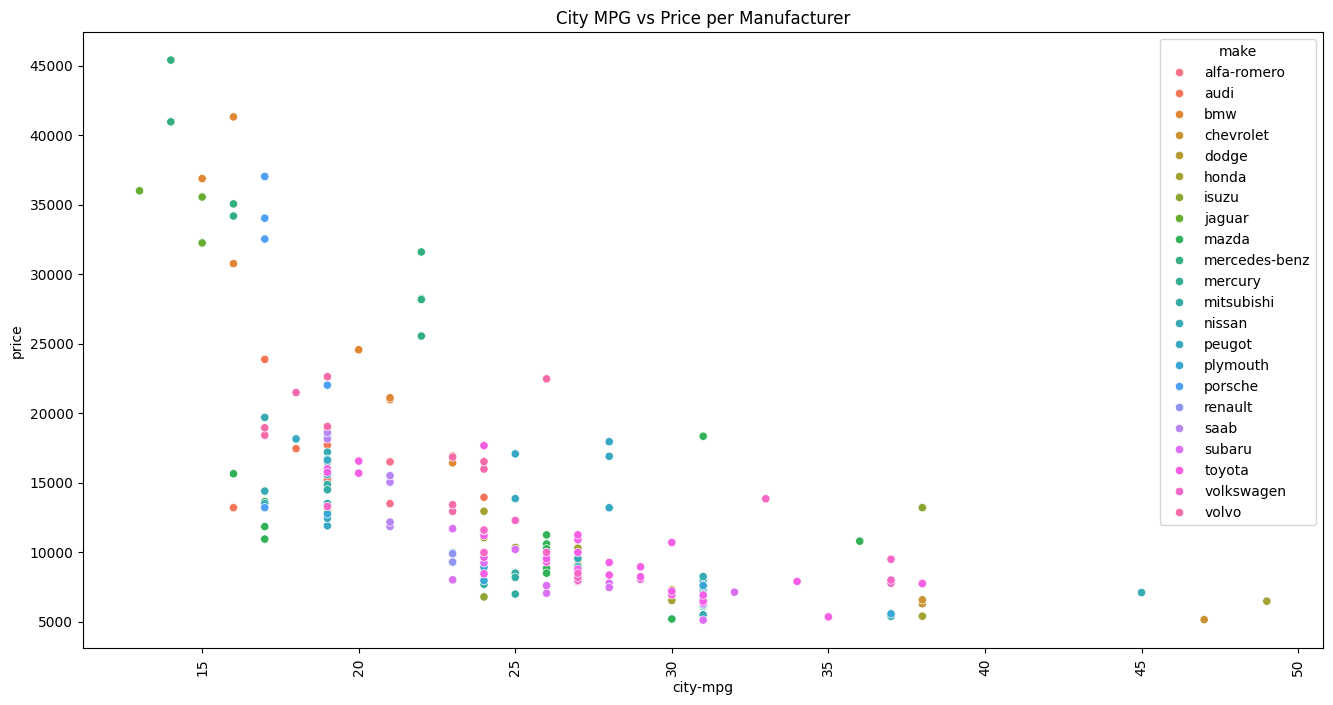

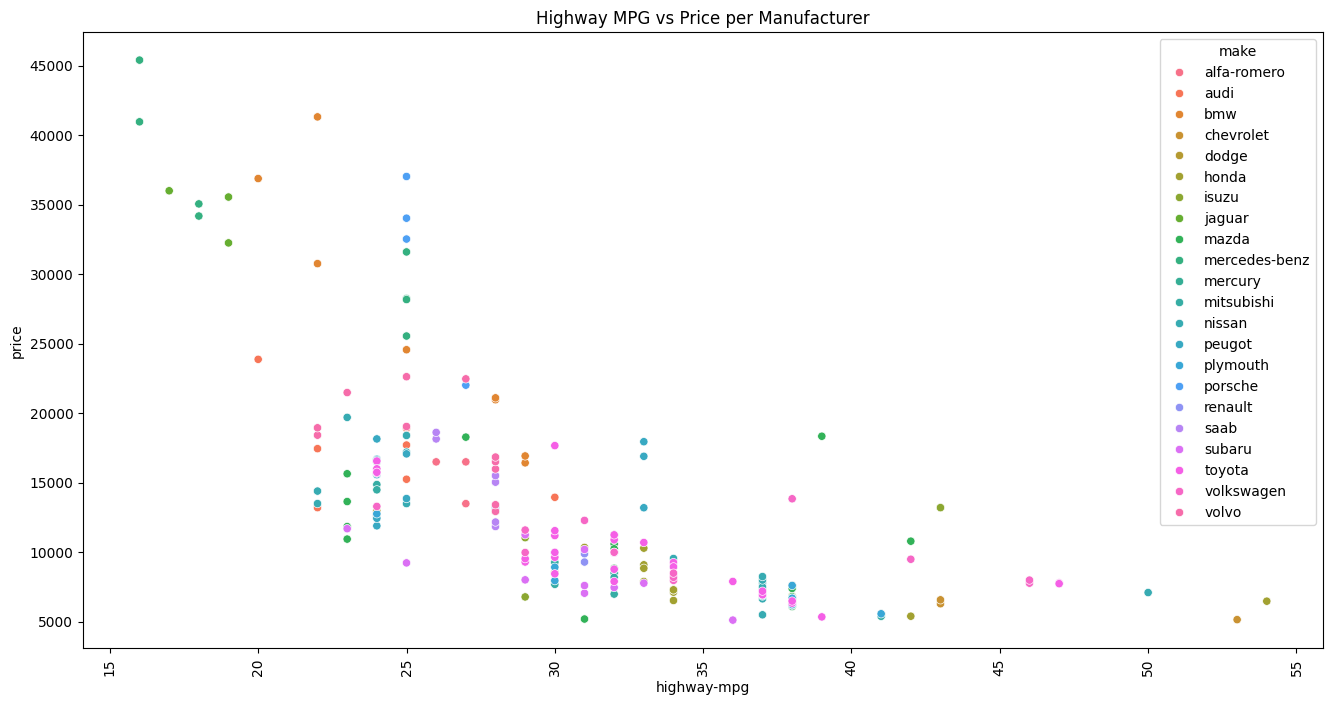

In [8]:
# Five most expensive cars

plt.figure(figsize=(16,8))
sns.scatterplot(data=automobiles_df, x="city-mpg", y="price", hue="make")
plt.title("City MPG vs Price per Manufacturer")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,8))
sns.scatterplot(data=automobiles_df, x="highway-mpg", y="price", hue="make")
plt.title("Highway MPG vs Price per Manufacturer")
plt.xticks(rotation=90)
plt.show()



#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

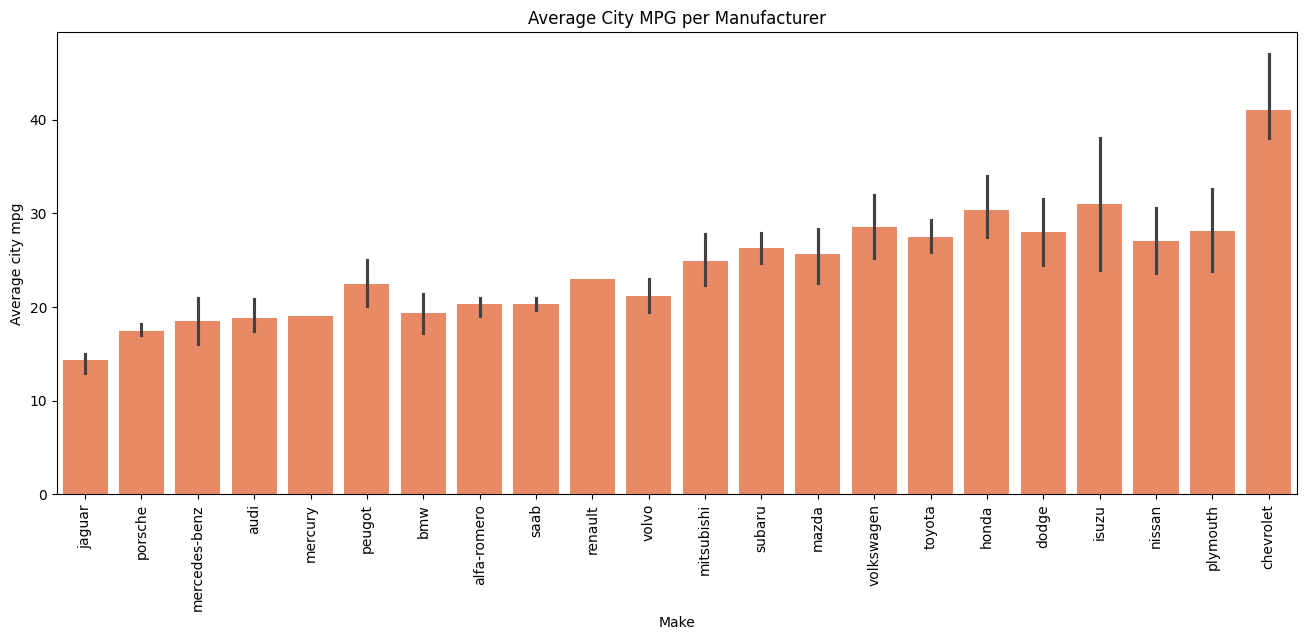

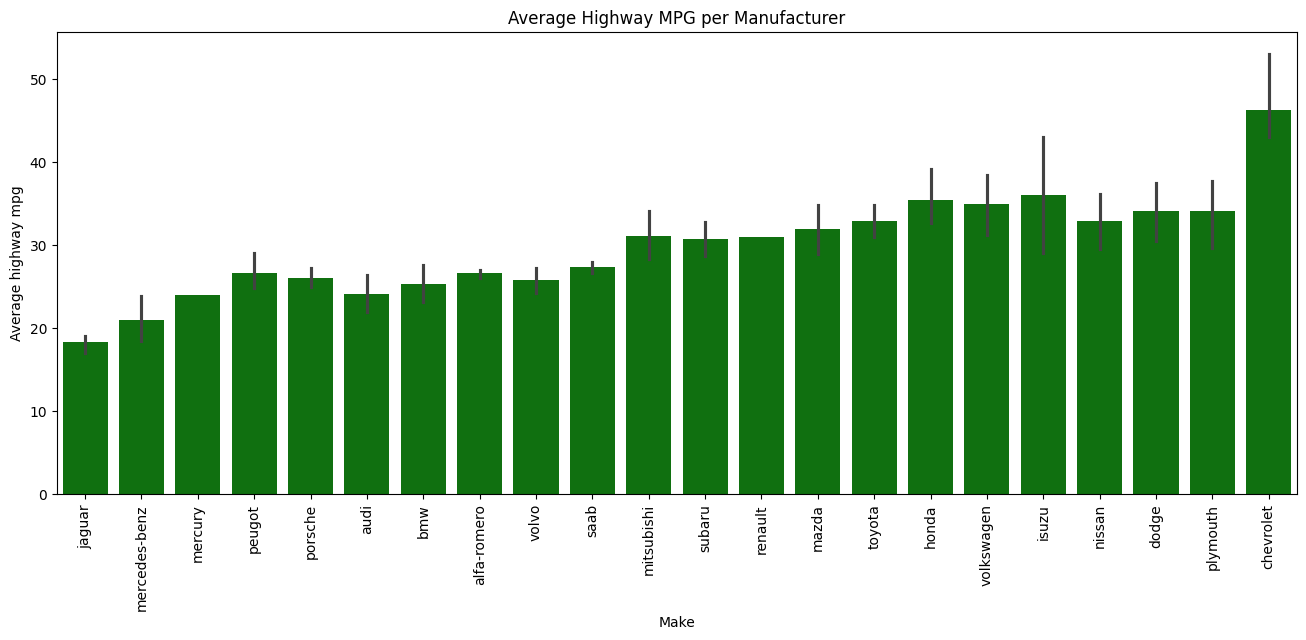

In [9]:
# Manufacturer vs Average mpg
avg_city_mpg = automobiles_df.groupby("make")["city-mpg"].median().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(data=automobiles_df, x="make", y="city-mpg",order=avg_city_mpg.sort_values("city-mpg")["make"].tolist(), color="coral")
plt.title("Average City MPG per Manufacturer")
plt.xlabel("Make")
plt.ylabel("Average city mpg")
plt.xticks(rotation=90)
plt.show()

avg_highway_mpg = automobiles_df.groupby("make")["highway-mpg"].median().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(data=automobiles_df, x="make", y="highway-mpg",order=avg_highway_mpg.sort_values("highway-mpg")["make"].tolist(), color="green")
plt.title("Average Highway MPG per Manufacturer")
plt.xlabel("Make")
plt.ylabel("Average highway mpg")
plt.xticks(rotation=90)
plt.show()




#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

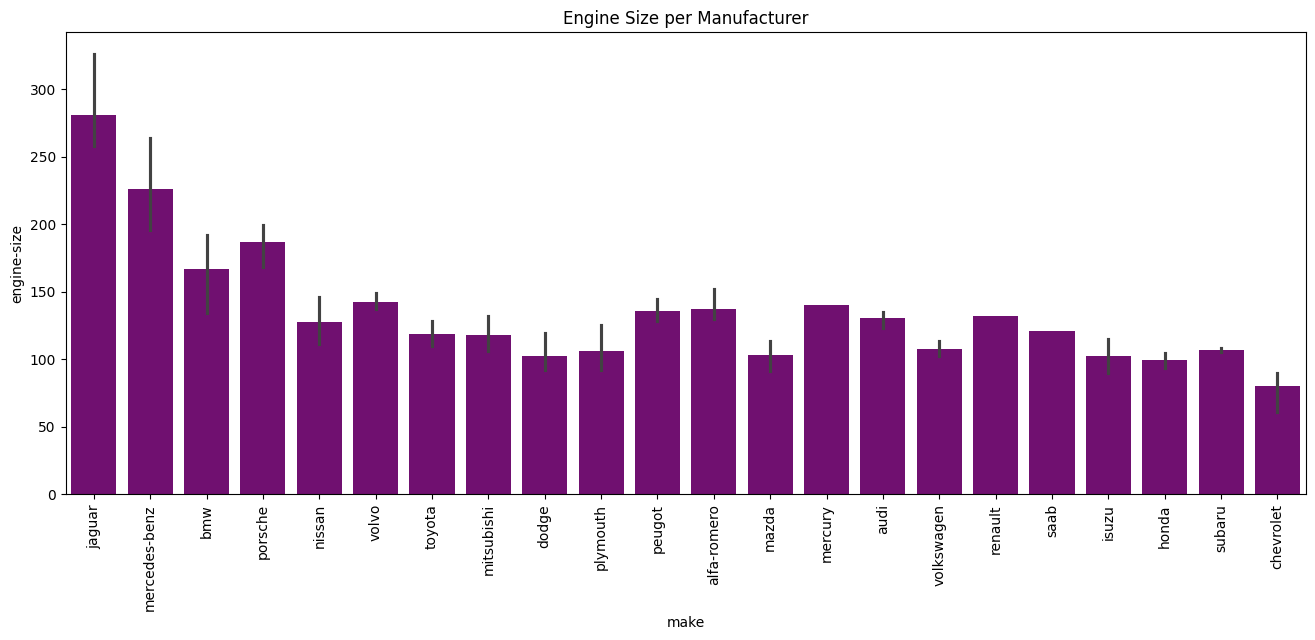

In [10]:
# Sort engine-size

sorted_engine_sizes = automobiles_df.sort_values("engine-size", ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(data=sorted_engine_sizes, x="make", y="engine-size", color="purple")
plt.title("Engine Size per Manufacturer")
plt.xticks(rotation=90)
plt.show()

#### Which vehicle manufacturer has the most car models in the dataset

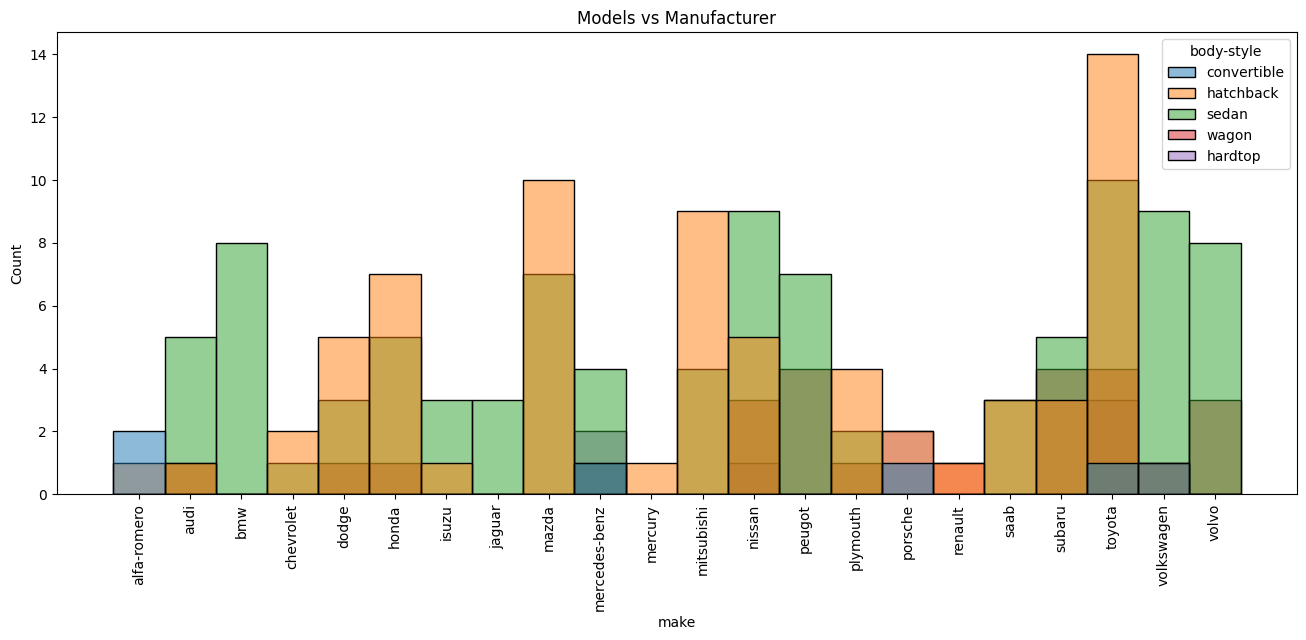

In [11]:
# Manufacturer with most car models
plt.figure(figsize=(16,6))
sns.histplot(data=automobiles_df, x="make", hue="body-style")
plt.title("Models vs Manufacturer")
plt.xticks(rotation=90)
plt.show()


